In [1]:
import aware_models as am

s = am.get_session()

In [2]:
devices = s.query(am.Device).order_by(am.Device.timestamp.desc()).all()

In [3]:
devices

[<Device "9" Device "d971dcb2-c9b7-4c1e-b8cc-4f0fa987e78b">,
 <Device "8" Device "8e5ddc9e-545f-43b7-b9ea-25bb30e1772e">,
 <Device "7" Device "e0cf5273-380b-4ac7-9664-44b03f0b3ccf">,
 <Device "6" Device "aa6d7688-58ee-46e5-b6ff-390385bf91d9">,
 <Device "5" Device "055071a1-1199-4f94-9dc5-0de64af632de">,
 <Device "3" Device "78694978-00c8-4d0a-9270-0c4973675eaa">,
 <Device "4" Device "8ac3a283-010e-4763-b519-751850dd6970">,
 <Device "1" Device "00b095de-7fd4-4a2c-bf7c-8dc2b8b04861">]

In [4]:
devices[0]

<Device "9" Device "d971dcb2-c9b7-4c1e-b8cc-4f0fa987e78b">

In [5]:
devices[1]

<Device "8" Device "8e5ddc9e-545f-43b7-b9ea-25bb30e1772e">

In [6]:
neil = s.query(am.Device).get(5)

In [7]:
neil_calls = s.query(am.Call).filter(am.Call.device_id == neil.device_id).all()
import pytz
eastern = pytz.timezone('US/Eastern')
for call in neil_calls:
    print("id: %d | time: %s | duration: %d | target: %s" % (call._id, call.timestamp.astimezone(eastern).isoformat(), call.call_duration, call.trace))

id: 1 | time: 2016-07-10T17:59:20.459000-04:00 | duration: 0 | target: 6EEB05DC-046B-4806-B83A-C1CEF120ACB1
id: 2 | time: 2016-07-10T17:59:22.541000-04:00 | duration: 2 | target: 6EEB05DC-046B-4806-B83A-C1CEF120ACB1
id: 3 | time: 2016-07-10T18:46:53.834000-04:00 | duration: 2851 | target: 6EEB05DC-046B-4806-B83A-C1CEF120ACB1
id: 4 | time: 2016-07-13T09:46:29.472000-04:00 | duration: 0 | target: 5C004E64-01CD-4CC5-A903-E9E17E92A258
id: 5 | time: 2016-07-13T09:46:30.825000-04:00 | duration: 1 | target: 5C004E64-01CD-4CC5-A903-E9E17E92A258
id: 6 | time: 2016-07-13T09:46:36.178000-04:00 | duration: 5 | target: 5C004E64-01CD-4CC5-A903-E9E17E92A258
id: 7 | time: 2016-07-13T11:52:32.659000-04:00 | duration: 0 | target: 06DB6D05-C9AA-4B4D-97FA-1E24B6AA0560
id: 8 | time: 2016-07-13T11:52:34.303000-04:00 | duration: 1 | target: 06DB6D05-C9AA-4B4D-97FA-1E24B6AA0560
id: 9 | time: 2016-07-13T12:02:58.468000-04:00 | duration: 624 | target: 06DB6D05-C9AA-4B4D-97FA-1E24B6AA0560
id: 10 | time: 2016-07-

In [8]:
not_neil = s.query(am.Call).filter(am.Call.device_id != neil.device_id).all()

In [9]:
len(not_neil)


5

In [10]:
reload(am)

<module 'aware_models' from 'aware_models.pyc'>

In [11]:
from datetime import datetime, timedelta
start_fri = eastern.localize(datetime(2016, 7, 15, 0, 0)).astimezone(pytz.utc)
end_fri = eastern.localize(datetime(2016, 7, 15, 23, 59, 59)).astimezone(pytz.utc)
accel_fri = s.query(am.Accelerometer).filter(am.Accelerometer.device_id == neil.device_id).filter(am.Accelerometer.timestamp > start_fri).filter(am.Accelerometer.timestamp <= end_fri).all()

In [12]:
len(accel_fri)


239406

In [13]:
import numpy as np

In [14]:
%matplotlib inline

In [15]:
from matplotlib import pyplot as plt

In [16]:
times = [accel.timestamp.astimezone(eastern) for accel in accel_fri]
x = [accel.double_values_0 for accel in accel_fri]
y = [accel.double_values_1 for accel in accel_fri]
z = [accel.double_values_2 for accel in accel_fri]
readings = [[float(xp), float(yp), float(zp)] for xp,yp,zp in zip(x, y, z)]

In [17]:
x_axis = np.array(times)

In [18]:
readings[:5]

[[-0.022171020507812, -0.042938232421875, 1.0064849853516],
 [-0.022735595703125, -0.043624877929688, 1.0049285888672],
 [-0.023773193359375, -0.04388427734375, 1.0085296630859],
 [-0.023452758789062, -0.044357299804688, 1.0086059570312],
 [-0.021484375, -0.043548583984375, 1.0056457519531]]

In [19]:
readings = np.array(readings)

In [20]:
readings.shape

(239406, 3)

In [21]:
x_axis.shape

(239406,)

In [22]:
x_axis.reshape(x_axis.shape[0], 1)

array([[ datetime.datetime(2016, 7, 15, 0, 13, 47, 465000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
       [ datetime.datetime(2016, 7, 15, 0, 13, 47, 564000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
       [ datetime.datetime(2016, 7, 15, 0, 13, 47, 663000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
       ..., 
       [ datetime.datetime(2016, 7, 15, 23, 22, 28, 34000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
       [ datetime.datetime(2016, 7, 15, 23, 22, 28, 132000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
       [ datetime.datetime(2016, 7, 15, 23, 22, 28, 231000, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)]], dtype=object)

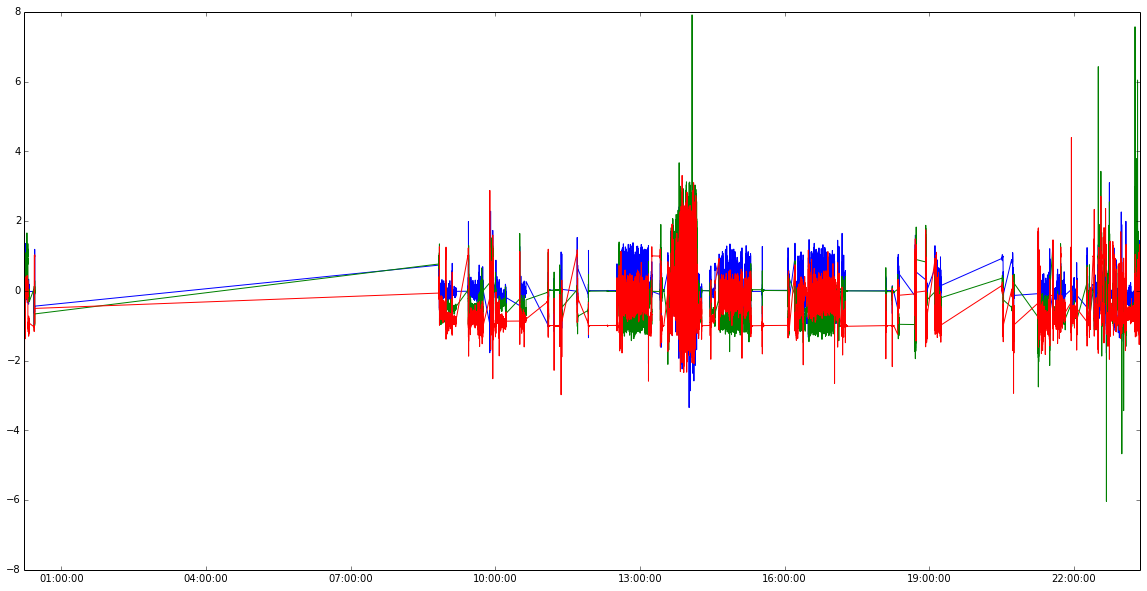

In [23]:
plt.figure(figsize=(20,10))
plt.plot(x_axis, readings)

In [24]:
reload(am)

<module 'aware_models' from 'aware_models.pyc'>